In [1]:
import pickle

# read
hand = open('/work/lilu/AttConvLSTM/input/lstm/'+'200.pickle','rb')
inputs_lstm = pickle.load(hand)

inputs = {}
inputs['x_train'] = inputs_lstm['x_train'][:,:,:,:,:3].reshape(8917, 10, -1)
inputs['y_train'] = inputs_lstm['y_train'].reshape(8917, 64)

inputs['x_valid'] = inputs_lstm['x_valid'][:,:,:,:,:3].reshape(2233, 10, -1)
inputs['y_valid'] = inputs_lstm['y_valid'].reshape(2233, 64)


with open('/work/lilu/AttConvLSTM/input/lstm/'+'200.pickle','wb') as fw:
    pickle.dump(inputs,fw)

IndexError: too many indices for array: array is 3-dimensional, but 5 were indexed

In [5]:
print(inputs_lstm['y_train'].shape)

(8917, 64)


In [4]:
hand = open('/work/lilu/AttConvLSTM/input/lstm/'+'200.pickle','rb')
inputs_lstm = pickle.load(hand)
inputs['y_train'].shape

KeyError: 'y_train'

In [30]:
# read
hand = open('/work/lilu/AttConvLSTM/input/lstm/'+'200.pickle','rb')
inputs_lstm = pickle.load(hand)

inputs = {}
inputs['x_train'] = inputs_lstm['x_train'][:,:,12:20,12:20,:3]
inputs['y_train'] = inputs_lstm['y_train']

inputs['x_valid'] = inputs_lstm['x_valid'][:,:,12:20,12:20,:3]
inputs['y_valid'] = inputs_lstm['y_valid']

inputs['x_train'].shape

(4448, 10, 8, 8, 3)

In [ ]:
with open('/work/lilu/AttConvLSTM/input/lstm/'+'200.pickle','wb') as fw:
    pickle.dump(inputs,fw)

# Tune LSTM

In [36]:
import pickle
import numpy as np

ROOT = '/work/lilu/AttConvLSTM/output/'
f = open(ROOT+'200.pickle','rb')
out = pickle.load(f)
print(out.keys())

y_valid = np.squeeze(out['y_valid'])
pred_valid = np.squeeze(out['pred_valid'])

dict_keys(['y_valid', 'pred_valid'])


In [37]:
r2 = np.zeros((8,8))
rmse = np.zeros((8,8))

from sklearn.metrics import r2_score, mean_squared_error
for i in range(8):
    for j in range(8):
        r2[i,j] = r2_score(y_valid[:,i,j], pred_valid[:,i,j])
        rmse[i,j] = np.sqrt(mean_squared_error(y_valid[:,i,j], pred_valid[:,i,j]))

In [20]:
# num of hidden cell (16)
print(np.nanmean(r2))
print(np.nanmean(rmse))

0.7718979585382295
0.06979697590445506


In [23]:
# num of hidden cell (32)
print(np.nanmean(r2))
print(np.nanmean(rmse))

0.7736466436806428
0.06952577467636932


In [26]:
# num of hidden cell (64)
print(np.nanmean(r2))
print(np.nanmean(rmse))

0.7744753789052436
0.06942479295983324


In [29]:
# num of hidden cell (128)
print(np.nanmean(r2))
print(np.nanmean(rmse))

0.7746877773359662
0.06940665381402478


## we select 32 cell in hidden layer

In [32]:
# num of hidden cell (32), batch size (32)
print(np.nanmean(r2))
print(np.nanmean(rmse))

0.7724101921613261
0.06970377482712022


In [35]:
# num of hidden cell (32), batch size (16)
print(np.nanmean(r2))
print(np.nanmean(rmse))

0.771165944325255
0.06992144663664002


In [38]:
# num of hidden cell (32), batch size (128)
print(np.nanmean(r2))
print(np.nanmean(rmse))

0.7760146536837081
0.06917687498778519


# we select 128 batch size

# Tune ConvLSTM

In [43]:
import pickle
import numpy as np

ROOT = '/work/lilu/AttConvLSTM/output/'
f = open(ROOT+'200.pickle','rb')
out = pickle.load(f)
print(out.keys())

y_valid = np.squeeze(out['y_valid'])
pred_valid = np.squeeze(out['pred_valid'])

dict_keys(['y_train', 'y_valid', 'pred_train', 'pred_valid'])


In [44]:
r2 = np.zeros((8,8))
rmse = np.zeros((8,8))

from sklearn.metrics import r2_score, mean_squared_error
for i in range(8):
    for j in range(8):
        r2[i,j] = r2_score(y_valid[:,i,j], pred_valid[:,i,j])
        rmse[i,j] = np.sqrt(mean_squared_error(y_valid[:,i,j], pred_valid[:,i,j]))

In [42]:
# num of hidden cell (32), batch size (128)
print(np.nanmean(r2))
print(np.nanmean(rmse))

0.5968351457019588
0.09264461363921461


In [45]:
# num of hidden cell (32), batch size (128)
print(np.nanmean(r2))
print(np.nanmean(rmse))

0.11762504466005605
0.13859141378512907


In [147]:
import tensorflow as tf
import numpy as np
import pickle

In [148]:
def lstm():

    # inputs
    inputs = tf.keras.layers.Input(shape=(10, 3))
    x = tf.keras.layers.LSTM(units=64, activation='tanh',
                             return_sequences=False)(inputs)
    x = tf.keras.layers.Dense(1, activation='tanh')(x)
    # build
    model = tf.keras.models.Model(inputs=inputs, outputs=x)
    # summary
    model.summary()

    return model

def dnn():

    # inputs
    inputs = tf.keras.layers.Input(shape=(30))
    x = tf.keras.layers.Dense(64, activation='tanh')(inputs)
    x = tf.keras.layers.Dense(1, activation='tanh')(x)
    # build
    model = tf.keras.models.Model(inputs=inputs, outputs=x)
    # summary
    model.summary()

    return model

def trainL(inputs):
    """Train keras LSTM"""
    model = lstm()
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.01),
        loss=['mse'],
    )
    history = model.fit(inputs['x_train'], inputs['y_train'],
                        batch_size=256,
                        epochs=10,
                        validation_split=0.2)
    
    y_pred = model.predict(inputs['x_valid'])

    r2 = r2_score(np.squeeze(inputs['y_valid']), np.squeeze(y_pred))
    rmse = np.sqrt(mean_squared_error(np.squeeze(inputs['y_valid']), np.squeeze(y_pred)))
    
    return r2, rmse


def trainD(inputs):
    """Train keras LSTM"""
    model = dnn()
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.01),
        loss=['mse'],
    )
    
    N1 = inputs['x_train'].shape[0]
    N2 = inputs['x_valid'].shape[0]
 
    history = model.fit(inputs['x_train'].reshape(N1, -1), inputs['y_train'],
                        batch_size=128,
                        epochs=20,
                        validation_split=0.2)
    y_pred = model.predict(inputs['x_valid'].reshape(N2, -1))
    print(y_pred.shape)
    print(inputs['y_valid'].shape)

    r2 = r2_score(np.squeeze(inputs['y_valid']), np.squeeze(y_pred))
    rmse = np.sqrt(mean_squared_error(np.squeeze(inputs['y_valid']), np.squeeze(y_pred)))
    
    return r2, rmse
    #return np.concatenate([np.array(history.history['loss'])[:,np.newaxis], np.array(history.history['val_loss'])[:,np.newaxis]], axis=-1)



In [149]:
r2_ = np.full((10, 2, 8, 8), np.nan)
rmse_ = np.full((10, 2, 8, 8), np.nan)

for k in range(120,130):
    
    handle = open('/work/lilu/AttConvLSTM/input/lstm/'+str(k)+'.pickle', 'rb')
    inputs = pickle.load(handle)
    
    if np.isnan(inputs['y_train']).any() or np.isnan(inputs['x_train'].any()):
        print('NO')
    else:
        for i in range(8):
            for j in range(8):
                print(i)
                print(j)
                _inputs = {}
                _inputs['x_train'] = inputs['x_train'][:, :, i, j, :]
                _inputs['x_valid'] = inputs['x_valid'][:, :, i, j, :]
                _inputs['y_train'] = inputs['y_train'][:, :, i, j, :]
                _inputs['y_valid'] = inputs['y_valid'][:, :, i, j, :]

                r2_[k-120, 0, i, j], rmse_[k-120, 0, i,j] = trainD(_inputs)
                r2_[k-120, 1, i, j], rmse_[k-120, 1, i,j] = trainL(_inputs)


0
0
Model: "model_1286"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1287 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_1841 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_1842 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 1s 18ms/step - loss: 0.0551 - val_loss: 0.0017
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0032 - val_

Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0037 - val_loss: 0.0011
0
2
Model: "model_1290"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1291 (InputLayer)      [(None, 30)]          

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0157 - val_loss: 0.0035
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0082 - val_loss: 0.0033
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0034
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0036
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0033
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0032
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0039
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0035
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0032
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0032
0
4
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1297"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1298 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_736 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_1858 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 3s 60ms/step - loss: 0.0263 - val_loss: 0.0053
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 4/10
28/28 [==============================] - 1s 22ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0021
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0032
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0025
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0021
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0021
Epoch 19/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0021
(2233, 1)
(2233, 1, 1)
Model: "model_1301"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1302 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0013
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 12/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0644 - val_loss: 0.0027
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0017
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0017
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0017
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0016
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0017
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0024
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0016
Epoch 11/20
56/56 [===========

1
5
Model: "model_1312"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1313 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_1880 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_1881 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1888 - val_loss: 0.0025
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0020
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0017
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0065 - val_loss: 0.0023
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0019
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0020
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0020
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0020
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0021
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0020
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0061 - val_loss: 0.0020
1
7
Model: "model_1316"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1317 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0176 - val_loss: 0.0026
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0053 - val_loss: 0.0027
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0047 - val_loss: 0.0021
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0019
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0047 - val_loss: 0.0018
2
1
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1323"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1324 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_749 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_1897 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0279 - val_loss: 0.0034
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0054 - val_loss: 0.0018
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0017
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0021
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0020
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0021
Epoch 16/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 17/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0021
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0021
Epoch 19/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0021
Epoch 20/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0024
(2233, 1)
(2233, 1, 1)
Model: "model_1327"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1328 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0023
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0026
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0028
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0022
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0025
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0030
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0026
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0033
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0022
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0023
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0287 - val_loss: 0.0020
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0019
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0019
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0018
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0024
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 11/20
56/56 [===========

3
2
Model: "model_1338"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1339 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_1919 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_1920 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1114 - val_loss: 0.0057
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0027
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0027
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0028
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0026
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0025
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0026
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0073 - val_loss: 0.0028
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0073 - val_loss: 0.0025
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0025
3
4
Model: "model_1342"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1343 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0160 - val_loss: 0.0035
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0067 - val_loss: 0.0027
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0023
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0025
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 6/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0022
3
6
Model: "model_13

Model: "model_1349"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1350 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_762 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_1936 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 29ms/step - loss: 0.0305 - val_loss: 0.0033
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 0.0021
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val

56/56 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0021
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0018
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0018
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0020
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0028
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0018
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0017
(2233, 1)
(2233, 1, 1)
Model: "model_1353"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1354 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0019
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0021
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0022
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0029
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0025
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0018
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0023
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0034
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0022
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0931 - val_loss: 0.0022
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0019
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0019
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0019
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0023
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0019
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0019
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0024
Epoch 11/20
56/56 [===========

4
7
Model: "model_1364"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1365 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_1958 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_1959 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1898 - val_loss: 0.0029
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0020
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0058 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0043 - val_loss: 0.0013
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0042 - val_loss: 0.0013
5
1
Model: "model_1368"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1369 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0206 - val_loss: 0.0060
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0083 - val_loss: 0.0043
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0040
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0038
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0077 - val_loss: 0.0043
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0037
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0077 - val_loss: 0.0038
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0036
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0037
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0036
5
3
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1375"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1376 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_775 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_1975 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0272 - val_loss: 0.0037
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0059 - val_loss: 0.0027
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0028
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0028
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0027
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0030
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0036
Epoch 20/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0033
(2233, 1)
(2233, 1, 1)
Model: "model_1379"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1380 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0029
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0038
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0022
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0023
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0019
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0018
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0026
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.2188 - val_loss: 0.0187
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0026
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0018
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0018
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 8/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0015
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0022
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0015
Epoch 11/20
56/56 [===========

6
4
Model: "model_1390"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1391 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_1997 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_1998 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1017 - val_loss: 0.0026
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0042 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0033
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0033
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0031
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0031
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0030
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0032
6
6
Model: "model_1394"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1395 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0201 - val_loss: 0.0041
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0074 - val_loss: 0.0035
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0034
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0032
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0065 - val_loss: 0.0031
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0033
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0031
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0030
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0032
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0029
7
0
Model: "model_13

Model: "model_1401"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1402 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_788 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2014 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0249 - val_loss: 0.0033
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0070 - val_loss: 0.0025
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0023
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 15/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 16/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0020
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0016
(2233, 1)
(2233, 1, 1)
Model: "model_1405"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1406 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0021
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0572 - val_loss: 0.0039
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0029
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0033
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0026
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 11/20
56/56 [===========

0
1
Model: "model_1416"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1417 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2036 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2037 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1130 - val_loss: 0.0027
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0015
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0050 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0057 - val_loss: 0.0017
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0016
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0015
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0015
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0020
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 0.0015
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0015
0
3
Model: "model_1420"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1421 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 31ms/step - loss: 0.0155 - val_loss: 0.0017
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0051 - val_loss: 0.0016
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0047 - val_loss: 0.0015
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0046 - val_loss: 0.0017
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0045 - val_loss: 0.0015
0
5
Model: "model_14

Model: "model_1427"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1428 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_801 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2053 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0268 - val_loss: 0.0031
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0033
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0015
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0015
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0017
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0016
(2233, 1)
(2233, 1, 1)
Model: "model_1431"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1432 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0023
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0019
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0014
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 11/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0014
Epoch 12/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.1228 - val_loss: 0.0021
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0022
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0016
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0046
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0016
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0029
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0022
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0023
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0044
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0016
Epoch 11/20
56/56 [===========

1
6
Model: "model_1442"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1443 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2075 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2076 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0536 - val_loss: 0.0023
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0026
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0030
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0030
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val_loss: 0.0028
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0057 - val_loss: 0.0032
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val_loss: 0.0025
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0057 - val_loss: 0.0026
2
0
Model: "model_1446"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1447 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 31ms/step - loss: 0.0175 - val_loss: 0.0030
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0059 - val_loss: 0.0023
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0057 - val_loss: 0.0022
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 0.0021
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0023
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0021
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0021
2
2
Model: "model_14

Model: "model_1453"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1454 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_814 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2092 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0263 - val_loss: 0.0025
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0064 - val_loss: 0.0023
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0060 - val_loss: 0.0019
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0026
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0022
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0023
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0021
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0021
(2233, 1)
(2233, 1, 1)
Model: "model_1457"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1458 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0022
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0029
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0029
Epoch 11/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0029
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.1955 - val_loss: 0.0298
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0040
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0019
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0022
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 11/20
56/56 [===========

3
3
Model: "model_1468"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1469 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2114 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2115 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 1s 3ms/step - loss: 0.0972 - val_loss: 0.0030
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0020
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0057 - val_loss: 0.0024
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0021
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0022
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0053 - val_loss: 0.0022
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0021
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0024
3
5
Model: "model_1472"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1473 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0212 - val_loss: 0.0059
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0056 - val_loss: 0.0023
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0023
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0022
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0021
3
7
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1479"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1480 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_827 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2131 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 3s 60ms/step - loss: 0.0240 - val_loss: 0.0027
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0055 - val_loss: 0.0026
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0052 - val_loss: 0.0022
Epoch 4/10
28/28 [==============================] - 1s 22ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0020
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0036
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0021
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0017
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0018
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0018
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0027
(2233, 1)
(2233, 1, 1)
Model: "model_1483"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1484 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0029
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0018
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0024
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0026
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.2777 - val_loss: 0.0401
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0041
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0030
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0038
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0047
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0023
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0022
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0028
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 11/20
56/56 [===========

5
0
Model: "model_1494"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1495 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2153 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2154 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.0034
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0029
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0019
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0020
5
2
Model: "model_1498"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1499 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0170 - val_loss: 0.0030
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0072 - val_loss: 0.0027
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0023
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0027
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0024
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0023
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0025
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0024
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0022
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0022
5
4
Model: "model_15

Model: "model_1505"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1506 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_840 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2170 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0157 - val_loss: 0.0026
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0062 - val_loss: 0.0028
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0060 - val_loss: 0.0021
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val

56/56 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0037
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0018
Epoch 15/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0027
Epoch 16/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0026
Epoch 17/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0018
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0027
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0038
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0022
(2233, 1)
(2233, 1, 1)
Model: "model_1509"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1510 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0022
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0034
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0022
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0024
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0020
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0022
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0027
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0628 - val_loss: 0.0015
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0016
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0024
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 11/20
56/56 [===========

6
5
Model: "model_1520"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1521 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2192 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2193 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0638 - val_loss: 0.0068
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0028
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0039
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0065 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0029
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0042
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0031
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0026
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0073 - val_loss: 0.0022
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0073 - val_loss: 0.0033
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0071 - val_loss: 0.0025
6
7
Model: "model_1524"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1525 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0223 - val_loss: 0.0031
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0058 - val_loss: 0.0027
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0054 - val_loss: 0.0026
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0051 - val_loss: 0.0024
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0051 - val_loss: 0.0024
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0022
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0022
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0024
7
1
Model: "model_15

Model: "model_1531"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1532 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_853 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2209 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0223 - val_loss: 0.0045
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0062 - val_loss: 0.0022
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0057 - val_loss: 0.0020
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0056 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0023
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0048
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0024
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0027
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0023
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0023
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0033
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0023
(2233, 1)
(2233, 1, 1)
Model: "model_1535"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1536 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0025
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0027
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0020
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0020
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0022
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0028
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0018
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0019
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0805 - val_loss: 0.0028
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0028
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0029
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0032
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0026
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0024
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0025
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0031
Epoch 11/20
56/56 [===========

0
2
Model: "model_1546"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1547 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2231 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2232 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1492 - val_loss: 0.0093
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0029
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0036
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0017
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0020
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0017
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val_loss: 0.0021
0
4
Model: "model_1550"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1551 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 29ms/step - loss: 0.0289 - val_loss: 0.0019
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0066 - val_loss: 0.0024
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0020
Epoch 4/10
28/28 [==============================] - 1s 20ms/step - loss: 0.0061 - val_loss: 0.0027
Epoch 5/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0060 - val_loss: 0.0019
Epoch 6/10
28/28 [==============================] - 0s 16ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 7/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 8/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0059 - val_loss: 0.0023
Epoch 9/10
28/28 [==============================] - 0s 16ms/step - loss: 0.0059 - val_loss: 0.0024
Epoch 10/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0059 - val_loss: 0.0017
0
6
Model: "model_15

Model: "model_1557"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1558 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_866 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2248 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0226 - val_loss: 0.0020
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0051 - val_loss: 0.0016
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0047 - val_loss: 0.0016
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0047 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0019
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0016
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0024
(2233, 1)
(2233, 1, 1)
Model: "model_1561"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1562 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0029
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0015
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0023
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0018
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0015
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.2552 - val_loss: 0.1704
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2540 - val_loss: 0.1700
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2442 - val_loss: 0.2538
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0015
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0016
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0016
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0016
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0017
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0020
Epoch 11/20
56/56 [===========

1
7
Model: "model_1572"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1573 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2270 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2271 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.2411 - val_loss: 0.1650
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2395 - val_loss: 0.1640
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.1924 - val_loss: 0.0225
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0101 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0025
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0047 - val_loss: 0.0020
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0045 - val_loss: 0.0024
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0046 - val_loss: 0.0020
2
1
Model: "model_1576"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1577 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 29ms/step - loss: 0.0356 - val_loss: 0.0031
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0076 - val_loss: 0.0030
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0027
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0065 - val_loss: 0.0027
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0065 - val_loss: 0.0038
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0021
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0026
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0022
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0023
2
3
Model: "model_15

Model: "model_1583"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1584 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_879 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2287 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 29ms/step - loss: 0.0260 - val_loss: 0.0015
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0051 - val_loss: 0.0018
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0016
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0029
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0018
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0012
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0017
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0012
(2233, 1)
(2233, 1, 1)
Model: "model_1587"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1588 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0023
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0020
Epoch 12/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0017
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0017
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.1251 - val_loss: 0.0051
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0013
Epoch 11/20
56/56 [===========

28/28 [==============================] - 1s 23ms/step - loss: 0.0042 - val_loss: 0.0013
3
4
Model: "model_1598"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1599 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2309 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2310 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1468 - val_loss: 0.0027
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0030
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.001

28/28 [==============================] - 1s 22ms/step - loss: 0.0075 - val_loss: 0.0030
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0033
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0021
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0018
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0017
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0016
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0024
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0026
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0018
3
6
Model: "model_1602"
_________________________________________________________________
Layer (type)                 

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0323 - val_loss: 0.0021
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0081 - val_loss: 0.0024
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0072 - val_loss: 0.0024
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0020
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0021
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0018
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0022
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0018
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0017
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0016
4
0
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1609"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1610 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_892 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2326 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0269 - val_loss: 0.0042
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0021
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0040
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0039
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0012
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0021
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0015
(2233, 1)
(2233, 1, 1)
Model: "model_1613"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1614 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0018
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0046
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0055
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0023
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0019
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0020
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0017
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0021
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0017
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0017
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.1052 - val_loss: 0.0040
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0016
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0019
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0016
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0021
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0015
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0016
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0021
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0018
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0014
Epoch 11/20
56/56 [===========

5
1
Model: "model_1624"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1625 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2348 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2349 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.0027
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0024
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0026
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0065 - val_l

28/28 [==============================] - 1s 22ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0057 - val_loss: 0.0018
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 0.0019
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0019
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0018
5
3
Model: "model_1628"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1629 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0317 - val_loss: 0.0018
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0065 - val_loss: 0.0027
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0061 - val_loss: 0.0018
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0017
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0019
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val_loss: 0.0023
5
5
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1635"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1636 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_905 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2365 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0225 - val_loss: 0.0028
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0083 - val_loss: 0.0022
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0021
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0029
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0025
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0019
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0025
Epoch 17/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 18/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0026
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 20/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0021
(2233, 1)
(2233, 1, 1)
Model: "model_1639"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1640 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0038
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0024
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0023
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0024
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0026
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0026
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0023
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0029
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0029
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0021
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0781 - val_loss: 0.0023
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0021
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0019
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0017
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0018
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0021
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0019
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0018
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0021
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0020
Epoch 11/20
56/56 [===========

6
6
Model: "model_1650"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1651 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2387 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2388 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1409 - val_loss: 0.0072
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0020
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0018
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0087 - val_loss: 0.0024
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0020
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0083 - val_loss: 0.0022
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0082 - val_loss: 0.0022
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0019
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0021
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0020
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0022
7
0
Model: "model_1654"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1655 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0287 - val_loss: 0.0028
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0069 - val_loss: 0.0026
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0026
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0025
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0027
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0024
7
2
Model: "model_16

Model: "model_1661"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1662 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_918 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2404 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 3s 61ms/step - loss: 0.0203 - val_loss: 0.0032
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0065 - val_loss: 0.0028
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0061 - val_loss: 0.0025
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0059 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0017
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0019
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0020
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0015
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0016
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0015
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0017
(2233, 1)
(2233, 1, 1)
Model: "model_1665"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1666 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0017
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0017
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0015
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0021
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0014
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0020
Epoch 11/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0027
Epoch 12/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0014
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0015
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0020
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.1067 - val_loss: 0.0020
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0016
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0014
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0015
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0016
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0018
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0022
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0019
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 11/20
56/56 [===========

0
3
Model: "model_1676"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1677 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2426 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2427 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.2732 - val_loss: 0.1960
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2059 - val_loss: 0.0069
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0014
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0049 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0093 - val_loss: 0.0034
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0091 - val_loss: 0.0031
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0091 - val_loss: 0.0038
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0090 - val_loss: 0.0033
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0091 - val_loss: 0.0033
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0089 - val_loss: 0.0029
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0090 - val_loss: 0.0039
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0089 - val_loss: 0.0035
0
5
Model: "model_1680"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1681 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0212 - val_loss: 0.0038
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0105 - val_loss: 0.0033
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0102 - val_loss: 0.0033
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0101 - val_loss: 0.0036
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0100 - val_loss: 0.0033
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0099 - val_loss: 0.0033
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0033
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0035
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0034
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0097 - val_loss: 0.0032
0
7
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1687"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1688 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_931 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2443 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0373 - val_loss: 0.0018
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0058 - val_loss: 0.0016
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0016
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0018
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 15/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0012
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0012
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0016
(2233, 1)
(2233, 1, 1)
Model: "model_1691"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1692 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0022
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0018
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0018
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0017
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0016
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0032
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0017
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0018
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0021
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0023
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0591 - val_loss: 0.0022
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0024
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0023
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0024
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0031
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0024
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0022
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0022
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0031
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0023
Epoch 11/20
56/56 [===========

2
0
Model: "model_1702"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1703 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2465 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2466 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1241 - val_loss: 0.0027
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0025
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0018
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0019
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0082 - val_loss: 0.0021
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0018
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0020
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0020
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0019
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0018
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0022
2
2
Model: "model_1706"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1707 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 29ms/step - loss: 0.0304 - val_loss: 0.0012
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0069 - val_loss: 0.0012
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0013
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0061 - val_loss: 0.0013
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0060 - val_loss: 0.0014
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0013
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0014
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0013
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0017
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0012
2
4
Model: "model_17

Model: "model_1713"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1714 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_944 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2482 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0263 - val_loss: 0.0040
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0094 - val_loss: 0.0016
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0016
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0022
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0018
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0018
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0018
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0019
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0018
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0020
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0019
(2233, 1)
(2233, 1, 1)
Model: "model_1717"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1718 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0019
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0024
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0022
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0016
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0012
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0028
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0019
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0015
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0019
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.1502 - val_loss: 0.0017
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0016
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0014
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0017
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0015
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0014
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0014
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0014
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0014
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0015
Epoch 11/20
56/56 [===========

3
5
Model: "model_1728"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1729 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2504 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2505 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.2573 - val_loss: 0.1056
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0276 - val_loss: 0.0021
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0018
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0093 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0094 - val_loss: 0.0021
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0093 - val_loss: 0.0021
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0093 - val_loss: 0.0020
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0091 - val_loss: 0.0021
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0090 - val_loss: 0.0022
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0089 - val_loss: 0.0021
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0089 - val_loss: 0.0020
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0088 - val_loss: 0.0020
3
7
Model: "model_1732"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1733 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0334 - val_loss: 0.0032
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0077 - val_loss: 0.0020
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0072 - val_loss: 0.0016
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0016
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0017
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0015
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0016
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0016
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0016
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0017
4
1
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1739"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1740 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_957 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2521 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 29ms/step - loss: 0.0250 - val_loss: 0.0025
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0078 - val_loss: 0.0015
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0073 - val_loss: 0.0014
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0026
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0017
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0019
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0020
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0019
Epoch 18/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0031
Epoch 19/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0021
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0018
(2233, 1)
(2233, 1, 1)
Model: "model_1743"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1744 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0018
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0022
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0018
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0017
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0016
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0019
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0017
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0017
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0016
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0017
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0809 - val_loss: 0.0022
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0020
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0020
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0023
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0020
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0024
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0019
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0019
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0020
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0018
Epoch 11/20
56/56 [===========

5
2
Model: "model_1754"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1755 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2543 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2544 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0945 - val_loss: 0.0032
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0017
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0019
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0077 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0082 - val_loss: 0.0034
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0029
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0026
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0025
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0026
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0024
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0023
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0023
5
4
Model: "model_1758"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1759 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0348 - val_loss: 0.0033
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0096 - val_loss: 0.0032
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0088 - val_loss: 0.0029
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0087 - val_loss: 0.0029
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0028
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0028
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0085 - val_loss: 0.0029
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0031
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0031
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0083 - val_loss: 0.0027
5
6
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1765"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1766 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_970 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2560 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0239 - val_loss: 0.0036
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0111 - val_loss: 0.0045
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0108 - val_loss: 0.0032
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0017
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0025
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0017
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0031
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0020
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0019
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0025
Epoch 20/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0019
(2233, 1)
(2233, 1, 1)
Model: "model_1769"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1770 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0024
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0024
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0026
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0024
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0024
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0027
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0029
Epoch 12/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0039
Epoch 13/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0023
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0025
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0348 - val_loss: 0.0041
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0033
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0027
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0034
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0028
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0040
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0028
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0028
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0028
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0027
Epoch 11/20
56/56 [===========

6
7
Model: "model_1780"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1781 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2582 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2583 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.0049
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0050
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0047
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0116 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0030
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0025
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0077 - val_loss: 0.0020
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0019
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0019
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0018
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0022
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0018
7
1
Model: "model_1784"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1785 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 3s 30ms/step - loss: 0.0203 - val_loss: 0.0020
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0068 - val_loss: 0.0018
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0061 - val_loss: 0.0017
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0061 - val_loss: 0.0017
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0060 - val_loss: 0.0019
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0061 - val_loss: 0.0016
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0060 - val_loss: 0.0018
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0060 - val_loss: 0.0016
7
3
Model: "model_17

Model: "model_1791"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1792 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_983 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2599 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0331 - val_loss: 0.0036
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0083 - val_loss: 0.0034
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0025
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0077 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0043
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0047
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0035
Epoch 16/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0038
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0034
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0026
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0028
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0038
(2233, 1)
(2233, 1, 1)
Model: "model_1795"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1796 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0031
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0043
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0030
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0031
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.0035
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0031
Epoch 11/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0033
Epoch 12/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.0039
Epoch 13/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0034
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0032
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.2002 - val_loss: 0.0248
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0030
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0029
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0030
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0029
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0050
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0028
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0040
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0030
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0037
Epoch 11/20
56/56 [===========

0
4
Model: "model_1806"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1807 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2621 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2622 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1859 - val_loss: 0.0182
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0035
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0033
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0086 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0089 - val_loss: 0.0049
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0087 - val_loss: 0.0049
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0088 - val_loss: 0.0049
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0088 - val_loss: 0.0046
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0049
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0047
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0045
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0053
0
6
Model: "model_1810"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1811 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 29ms/step - loss: 0.0181 - val_loss: 0.0067
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0107 - val_loss: 0.0091
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0105 - val_loss: 0.0072
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0103 - val_loss: 0.0069
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0101 - val_loss: 0.0068
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0106 - val_loss: 0.0075
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0103 - val_loss: 0.0075
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0101 - val_loss: 0.0061
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0099 - val_loss: 0.0071
Epoch 10/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0101 - val_loss: 0.0060
1
0
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1817"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1818 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_996 (LSTM)              (None, 64)                17408     
_________________________________________________________________
dense_2638 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0343 - val_loss: 0.0039
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0106 - val_loss: 0.0033
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0101 - val_loss: 0.0039
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0041
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0037
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0037
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0049
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0038
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0038
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0043
Epoch 20/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0041
(2233, 1)
(2233, 1, 1)
Model: "model_1821"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1822 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0032
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0035
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0047
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0028
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0031
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0056
Epoch 11/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0031
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0028
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0034
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0040
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.0057
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0065
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0065
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0057
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.0066
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0062
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.0058
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0055
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.0052
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0052
Epoch 11/20
56/56 [===========

2
1
Model: "model_1832"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1833 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2660 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2661 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.2249 - val_loss: 0.1702
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2236 - val_loss: 0.1701
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2235 - val_loss: 0.1700
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2234 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0115 - val_loss: 0.0034
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0114 - val_loss: 0.0034
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0112 - val_loss: 0.0035
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0111 - val_loss: 0.0035
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0110 - val_loss: 0.0038
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0109 - val_loss: 0.0035
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0109 - val_loss: 0.0033
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0108 - val_loss: 0.0035
2
3
Model: "model_1836"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1837 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0303 - val_loss: 0.0054
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0134 - val_loss: 0.0048
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0130 - val_loss: 0.0055
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0129 - val_loss: 0.0047
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0128 - val_loss: 0.0054
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0127 - val_loss: 0.0050
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0127 - val_loss: 0.0045
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0126 - val_loss: 0.0044
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0124 - val_loss: 0.0044
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0124 - val_loss: 0.0047
2
5
Model: "model_18

Model: "model_1843"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1844 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1009 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_2677 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 29ms/step - loss: 0.0228 - val_loss: 0.0041
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0106 - val_loss: 0.0064
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0103 - val_loss: 0.0055
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0101 - val

56/56 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0028
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0022
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0019
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0020
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0021
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0021
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0020
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0026
(2233, 1)
(2233, 1, 1)
Model: "model_1847"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1848 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0020
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0019
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0022
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0019
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0026
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0018
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0018
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0019
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0020
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0018
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0695 - val_loss: 0.0041
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.0038
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0038
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0035
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0037
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0048
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0034
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0049
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.0051
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.0035
Epoch 11/20
56/56 [===========

3
6
Model: "model_1858"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1859 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2699 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2700 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0951 - val_loss: 0.0073
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0045
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.0042
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0123 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0099 - val_loss: 0.0050
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0099 - val_loss: 0.0047
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0044
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0097 - val_loss: 0.0036
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0100 - val_loss: 0.0041
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0039
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0096 - val_loss: 0.0041
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0096 - val_loss: 0.0044
4
0
Model: "model_1862"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1863 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0310 - val_loss: 0.0030
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0103 - val_loss: 0.0029
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0029
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0096 - val_loss: 0.0028
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0095 - val_loss: 0.0026
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0094 - val_loss: 0.0033
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0092 - val_loss: 0.0026
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0092 - val_loss: 0.0026
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0093 - val_loss: 0.0026
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0092 - val_loss: 0.0027
4
2
Model: "model_18

Model: "model_1869"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1870 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1022 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_2716 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0352 - val_loss: 0.0072
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0105 - val_loss: 0.0046
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0101 - val_loss: 0.0042
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0099 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0039
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0034
Epoch 15/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0044
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0029
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0045
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0032
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0040
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0045
(2233, 1)
(2233, 1, 1)
Model: "model_1873"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1874 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0049
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0043
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0045
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0037
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0031
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0031
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0031
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0031
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0035
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0542 - val_loss: 0.0035
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0058
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.0038
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0047
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0041
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0033
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0036
Epoch 8/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0037
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0034
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0043
Epoch 11/20
56/56 [===========

5
3
Model: "model_1884"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1885 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2738 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2739 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.2060 - val_loss: 0.2779
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.1293 - val_loss: 0.0124
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0064
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0094 - val_loss: 0.0047
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0091 - val_loss: 0.0048
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0090 - val_loss: 0.0051
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0089 - val_loss: 0.0040
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0091 - val_loss: 0.0038
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0089 - val_loss: 0.0046
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0089 - val_loss: 0.0043
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0088 - val_loss: 0.0034
5
5
Model: "model_1888"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1889 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0283 - val_loss: 0.0061
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0107 - val_loss: 0.0045
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0102 - val_loss: 0.0053
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0102 - val_loss: 0.0066
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0100 - val_loss: 0.0060
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0099 - val_loss: 0.0053
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0047
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0040
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0055
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0044
5
7
Model: "model_18

Model: "model_1895"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1896 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1035 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_2755 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0403 - val_loss: 0.0058
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0100 - val_loss: 0.0059
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0095 - val_loss: 0.0047
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0094 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0028
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0034
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0032
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0057
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0057
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0029
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0064
(2233, 1)
(2233, 1, 1)
Model: "model_1899"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1900 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0067
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0042
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0045
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0042
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0041
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0054
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0041
Epoch 12/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0071
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0058
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0047
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.2700 - val_loss: 0.2330
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2528 - val_loss: 0.2330
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2527 - val_loss: 0.2328
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2526 - val_loss: 0.2324
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.2504 - val_loss: 0.1538
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.0072
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0042
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0057
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0035
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0041
Epoch 11/20
56/56 [===========

7
0
Model: "model_1910"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1911 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2777 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2778 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.2009 - val_loss: 0.2388
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.1980 - val_loss: 0.2380
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.1887 - val_loss: 0.0374
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0188 - val_l

28/28 [==============================] - 1s 22ms/step - loss: 0.0082 - val_loss: 0.0043
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0081 - val_loss: 0.0046
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0079 - val_loss: 0.0037
Epoch 6/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0080 - val_loss: 0.0045
Epoch 7/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0079 - val_loss: 0.0034
Epoch 8/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0081 - val_loss: 0.0048
Epoch 9/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0078 - val_loss: 0.0037
Epoch 10/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0078 - val_loss: 0.0039
7
2
Model: "model_1914"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1915 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 29ms/step - loss: 0.0385 - val_loss: 0.0112
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0094 - val_loss: 0.0059
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0087 - val_loss: 0.0050
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0085 - val_loss: 0.0047
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0083 - val_loss: 0.0043
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0083 - val_loss: 0.0039
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0083 - val_loss: 0.0032
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0082 - val_loss: 0.0046
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0083 - val_loss: 0.0039
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0034
7
4
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1921"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1922 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1048 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_2794 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 26ms/step - loss: 0.0417 - val_loss: 0.0103
Epoch 2/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0100 - val_loss: 0.0050
Epoch 3/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0095 - val_loss: 0.0060
Epoch 4/10
28/28 [==============================] - 1s 22ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0089
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0047
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0049
Epoch 16/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0030
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0031
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0039
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0027
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0028
(2233, 1)
(2233, 1, 1)
Model: "model_1925"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1926 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0041
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0048
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0038
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0035
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0036
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0034
Epoch 11/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0052
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0036
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0035
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0034
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.0038
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0042
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0046
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0047
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0037
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0031
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0063
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0040
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0035
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0032
Epoch 11/20
56/56 [===========

0
5
Model: "model_1936"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1937 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2816 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2817 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1524 - val_loss: 0.0066
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0044
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0039
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0090 - val_l

28/28 [==============================] - 1s 22ms/step - loss: 0.0091 - val_loss: 0.0057
Epoch 4/10
28/28 [==============================] - 0s 16ms/step - loss: 0.0088 - val_loss: 0.0052
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0088 - val_loss: 0.0064
Epoch 6/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0087 - val_loss: 0.0042
Epoch 7/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0086 - val_loss: 0.0050
Epoch 8/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0085 - val_loss: 0.0039
Epoch 9/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0085 - val_loss: 0.0044
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0040
0
7
Model: "model_1940"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1941 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0215 - val_loss: 0.0042
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0099 - val_loss: 0.0070
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0095 - val_loss: 0.0064
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0094 - val_loss: 0.0056
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0093 - val_loss: 0.0050
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0092 - val_loss: 0.0046
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0092 - val_loss: 0.0045
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0091 - val_loss: 0.0041
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0090 - val_loss: 0.0044
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0091 - val_loss: 0.0042
1
1
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1947"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1948 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1061 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_2833 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 3s 30ms/step - loss: 0.0203 - val_loss: 0.0086
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0096 - val_loss: 0.0044
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0090 - val_loss: 0.0036
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0037
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0046
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0045
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0040
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0032
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0032
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0047
(2233, 1)
(2233, 1, 1)
Model: "model_1951"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1952 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0060
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0052
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0057
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0045
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0045
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0093
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0045
Epoch 12/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0062
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0040
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0039
Epoch 15/20
56/56 [=======

56/56 [==============================] - 1s 18ms/step - loss: 0.0998 - val_loss: 0.0096
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0040
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0056
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0033
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0051
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0049
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0046
Epoch 8/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0028
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.0031
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0034
Epoch 11/20
56/56 [==========

2
2
Model: "model_1962"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1963 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2855 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2856 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0319 - val_loss: 0.0039
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0053
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0039
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0086 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0063
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0049
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0041
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0045
Epoch 7/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0076 - val_loss: 0.0037
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0041
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0036
2
4
Model: "model_1966"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1967 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 3s 30ms/step - loss: 0.0315 - val_loss: 0.0074
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0114 - val_loss: 0.0070
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0108 - val_loss: 0.0069
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0108 - val_loss: 0.0076
Epoch 5/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0106 - val_loss: 0.0075
Epoch 6/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0106 - val_loss: 0.0078
Epoch 7/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0105 - val_loss: 0.0059
Epoch 8/10
28/28 [==============================] - 0s 16ms/step - loss: 0.0105 - val_loss: 0.0069
Epoch 9/10
28/28 [==============================] - 0s 16ms/step - loss: 0.0105 - val_loss: 0.0058
Epoch 10/10
28/28 [==============================] - 0s 16ms/step - loss: 0.0104 - val_loss: 0.0056
2
6
Model

(2233, 1)
(2233, 1, 1)
Model: "model_1973"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1974 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1074 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_2872 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0202 - val_loss: 0.0053
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0094 - val_loss: 0.0073
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0089 - val_loss: 0.0065
Epoch 4/10
28/28 [==============================] - 1s 21ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0032
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0035
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0030
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0034
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0044
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0029
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0029
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0029
(2233, 1)
(2233, 1, 1)
Model: "model_1977"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1978 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0028
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0043
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0024
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0026
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0023
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0027
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0045
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0207 - val_loss: 0.0068
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.0042
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0043
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0077
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0051
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0041
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0046
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0040
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.0042
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0040
Epoch 11/20
56/56 [===========

3
7
Model: "model_1988"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1989 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2894 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2895 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0529 - val_loss: 0.0054
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0047
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0047
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0090 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0111 - val_loss: 0.0050
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0110 - val_loss: 0.0051
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0110 - val_loss: 0.0047
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0108 - val_loss: 0.0047
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0109 - val_loss: 0.0051
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0107 - val_loss: 0.0053
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0107 - val_loss: 0.0050
Epoch 10/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0107 - val_loss: 0.0045
4
1
Model: "model_1992"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1993 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0253 - val_loss: 0.0048
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0102 - val_loss: 0.0059
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0097 - val_loss: 0.0048
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0095 - val_loss: 0.0048
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0094 - val_loss: 0.0052
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0093 - val_loss: 0.0044
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0094 - val_loss: 0.0042
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0093 - val_loss: 0.0059
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0093 - val_loss: 0.0041
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0092 - val_loss: 0.0047
4
3
Model: "model_19

Model: "model_1999"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2000 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1087 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_2911 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0212 - val_loss: 0.0043
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0063 - val_loss: 0.0053
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0045
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0058 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0030
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0032
Epoch 15/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0036
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0039
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0031
(2233, 1)
(2233, 1, 1)
Model: "model_2003"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2004 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0058
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0041
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0059
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0029
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0028
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0038
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0030
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0028
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0036
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0028
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.1115 - val_loss: 0.0057
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0049
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0049
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0044
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0041
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0041
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0040
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0043
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0041
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0041
Epoch 11/20
56/56 [===========

5
4
Model: "model_2014"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2015 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2933 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2934 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0715 - val_loss: 0.0046
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0043
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0034
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_l

28/28 [==============================] - 0s 16ms/step - loss: 0.0090 - val_loss: 0.0049
Epoch 4/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0088 - val_loss: 0.0043
Epoch 5/10
28/28 [==============================] - 0s 16ms/step - loss: 0.0088 - val_loss: 0.0041
Epoch 6/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0088 - val_loss: 0.0036
Epoch 7/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0087 - val_loss: 0.0038
Epoch 8/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0087 - val_loss: 0.0036
Epoch 9/10
28/28 [==============================] - 0s 18ms/step - loss: 0.0088 - val_loss: 0.0036
Epoch 10/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0086 - val_loss: 0.0037
5
6
Model: "model_2018"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2019 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0216 - val_loss: 0.0040
Epoch 2/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 3/10
28/28 [==============================] - 1s 19ms/step - loss: 0.0069 - val_loss: 0.0048
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0069 - val_loss: 0.0036
Epoch 5/10
28/28 [==============================] - 1s 18ms/step - loss: 0.0067 - val_loss: 0.0040
Epoch 6/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0066 - val_loss: 0.0037
Epoch 7/10
28/28 [==============================] - 0s 15ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 8/10
28/28 [==============================] - 1s 20ms/step - loss: 0.0065 - val_loss: 0.0047
Epoch 9/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0067 - val_loss: 0.0040
Epoch 10/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0065 - val_loss: 0.0040
6
0
Model: "model_20

Model: "model_2025"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2026 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1100 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_2950 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 29ms/step - loss: 0.0194 - val_loss: 0.0054
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0088 - val_loss: 0.0047
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0046
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0054
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0034
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0033
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0034
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0035
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0036
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0038
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0036
(2233, 1)
(2233, 1, 1)
Model: "model_2029"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2030 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0050
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.0041
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0036
Epoch 8/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0034
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0035
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0041
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0034
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0037
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0042
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0037
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.2488 - val_loss: 0.3396
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0900 - val_loss: 0.0056
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0058
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0050
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0062
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0046
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0051
Epoch 8/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0048
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0051
Epoch 11/20
56/56 [===========

7
1
Model: "model_2040"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2041 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_2972 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_2973 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.2258 - val_loss: 0.0769
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.0038
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0034
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0078 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0042
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0064 - val_loss: 0.0027
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0031
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0034
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0035
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0063 - val_loss: 0.0028
7
3
Model: "model_2044"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2045 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 29ms/step - loss: 0.0274 - val_loss: 0.0052
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0093 - val_loss: 0.0050
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0088 - val_loss: 0.0047
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0087 - val_loss: 0.0050
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0087 - val_loss: 0.0063
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0042
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0085 - val_loss: 0.0046
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0038
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0085 - val_loss: 0.0042
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0041
7
5
Model

(2233, 1)
(2233, 1, 1)
Model: "model_2051"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2052 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1113 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_2989 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0368 - val_loss: 0.0165
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0048
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0030
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0031
Epoch 16/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0032
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0036
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0031
(2233, 1)
(2233, 1, 1)
Model: "model_2055"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2056 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0039
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0042
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0037
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0038
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0066
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0043
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0037
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.1328 - val_loss: 0.0061
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0050
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0046
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0046
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0043
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0046
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0047
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0051
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0043
Epoch 11/20
56/56 [===========

0
6
Model: "model_2066"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2067 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_3011 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_3012 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0315 - val_loss: 0.0050
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0052
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0044
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0065 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0054 - val_loss: 0.0038
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0027
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0027
1
0
Model: "model_2070"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2071 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0241 - val_loss: 0.0049
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0090 - val_loss: 0.0057
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0083 - val_loss: 0.0086
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0059
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0052
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0061
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0049
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0045
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0077 - val_loss: 0.0045
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0077 - val_loss: 0.0043
1
2
Model: "model_20

Model: "model_2077"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2078 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1126 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_3028 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0230 - val_loss: 0.0060
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0072 - val_loss: 0.0058
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0045
Epoch 14/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0045
Epoch 15/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0045
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0042
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0048
(2233, 1)
(2233, 1, 1)
Model: "model_2081"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2082 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0035
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0033
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0036
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0035
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0041
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.0074
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0056
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0047
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0042
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0041
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0048
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0042
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0047
Epoch 11/20
56/56 [===========

2
3
Model: "model_2092"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2093 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_3050 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_3051 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.2239 - val_loss: 0.3538
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0539 - val_loss: 0.0122
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0075
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0059 - val_l

28/28 [==============================] - 1s 22ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0034
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0040
2
5
Model: "model_2096"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2097 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0278 - val_loss: 0.0034
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0059 - val_loss: 0.0066
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0045 - val_loss: 0.0028
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0044 - val_loss: 0.0029
2
7
Model

(2233, 1)
(2233, 1, 1)
Model: "model_2103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2104 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1139 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_3067 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0250 - val_loss: 0.0056
Epoch 2/10
28/28 [==============================] - 1s 20ms/step - loss: 0.0099 - val_loss: 0.0064
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0096 - val_loss: 0.0073
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0037
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0039
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0037
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0039
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0038
(2233, 1)
(2233, 1, 1)
Model: "model_2107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2108 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0031
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0075
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0026
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0028
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0029
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0029
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.2331 - val_loss: 0.3891
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.1575 - val_loss: 0.0048
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0041
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0038
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0034
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0030
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 11/20
56/56 [===========

4
0
Model: "model_2118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2119 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_3089 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_3090 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.0085
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0055
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.0049
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0095 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0101 - val_loss: 0.0075
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0097 - val_loss: 0.0072
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0059
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0095 - val_loss: 0.0057
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0096 - val_loss: 0.0053
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0095 - val_loss: 0.0048
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0095 - val_loss: 0.0057
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0095 - val_loss: 0.0062
4
2
Model: "model_2122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2123 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 29ms/step - loss: 0.0176 - val_loss: 0.0063
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0072 - val_loss: 0.0053
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0046
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0052
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0044
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0040
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0039
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0041
4
4
Model

(2233, 1)
(2233, 1, 1)
Model: "model_2129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2130 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1152 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_3106 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 3s 30ms/step - loss: 0.0228 - val_loss: 0.0070
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0079 - val_loss: 0.0059
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0075 - val_loss: 0.0057
Epoch 4/10
28/28 [==============================] - 1s 22ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0058
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 18/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0044
(2233, 1)
(2233, 1, 1)
Model: "model_2133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2134 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0033
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0031
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0031
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0034
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0041
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0038
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0600 - val_loss: 0.0086
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0097
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.0080
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0087
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0066
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0063
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0077
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0084
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0074
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0070
Epoch 11/20
56/56 [===========

5
5
Model: "model_2144"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2145 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_3128 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_3129 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1694 - val_loss: 0.0102
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0042
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0034
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0110 - val_loss: 0.0078
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0109 - val_loss: 0.0092
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0108 - val_loss: 0.0091
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0107 - val_loss: 0.0072
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0107 - val_loss: 0.0087
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0106 - val_loss: 0.0068
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0105 - val_loss: 0.0062
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0106 - val_loss: 0.0069
5
7
Model: "model_2148"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2149 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 3s 30ms/step - loss: 0.0226 - val_loss: 0.0063
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0091 - val_loss: 0.0068
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0088 - val_loss: 0.0060
Epoch 4/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0087 - val_loss: 0.0050
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0086 - val_loss: 0.0046
Epoch 6/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0085 - val_loss: 0.0053
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0085 - val_loss: 0.0046
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0049
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0084 - val_loss: 0.0046
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0054
6
1
Model

(2233, 1)
(2233, 1, 1)
Model: "model_2155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2156 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1165 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_3145 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0174 - val_loss: 0.0056
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0094 - val_loss: 0.0075
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0092 - val_loss: 0.0057
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.0088
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0092
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0088
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0088
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0089
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0095
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0100
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.0090
(2233, 1)
(2233, 1, 1)
Model: "model_2159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2160 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.0066
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0060
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0064
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0071
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0066
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0064
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.0076
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0064
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0061
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0059
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.2693 - val_loss: 0.3901
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0767 - val_loss: 0.0054
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0061
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0059
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0047
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0050
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0063
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0044
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0054
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0050
Epoch 11/20
56/56 [===========

7
2
Model: "model_2170"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2171 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_3167 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_3168 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.1569 - val_loss: 0.0125
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0068
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0075
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0057 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0081 - val_loss: 0.0097
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0067
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0060
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0056
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0058
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0051
7
4
Model: "model_2174"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2175 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0281 - val_loss: 0.0109
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0093 - val_loss: 0.0079
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0082 - val_loss: 0.0066
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0060
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0059
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0049
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0057
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0079 - val_loss: 0.0046
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0080 - val_loss: 0.0053
7
6
Model: "model_21

Model: "model_2181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2182 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1178 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_3184 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0219 - val_loss: 0.0095
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0129 - val_loss: 0.0085
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0127 - val_loss: 0.0097
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0125 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0032
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0032
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0032
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0042
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 20/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0035
(2233, 1)
(2233, 1, 1)
Model: "model_2185"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2186 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0042
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0041
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0038
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0038
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0041
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0054
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0040
Epoch 12/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0042
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0054
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0349 - val_loss: 0.0032
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0035
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0029
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 11/20
56/56 [===========

0
7
Model: "model_2196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2197 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_3206 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_3207 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0620 - val_loss: 0.0041
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0046
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0053
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0074 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0062 - val_loss: 0.0038
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0029
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0057 - val_loss: 0.0032
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 0.0026
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0057 - val_loss: 0.0027
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 0.0026
1
1
Model: "model_2200"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2201 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 30ms/step - loss: 0.0196 - val_loss: 0.0035
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0072 - val_loss: 0.0042
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0034
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0030
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0030
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0030
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0030
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0038
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0030
1
3
Model: "model_22

Model: "model_2207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2208 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1191 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_3223 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 59ms/step - loss: 0.0167 - val_loss: 0.0068
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0070 - val_loss: 0.0045
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val_loss: 0.0050
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0066 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0038
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0042
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0039
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0038
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0038
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0040
Epoch 19/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0046
Epoch 20/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0039
(2233, 1)
(2233, 1, 1)
Model: "model_2211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2212 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0028
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 8/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0024
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.1102 - val_loss: 0.0034
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0036
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0031
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0032
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0029
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0029
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 11/20
56/56 [===========

2
4
Model: "model_2222"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2223 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_3245 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_3246 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0563 - val_loss: 0.0056
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0051
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0058
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0049
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0049
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0076 - val_loss: 0.0045
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0077 - val_loss: 0.0045
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0078 - val_loss: 0.0050
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0049
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0047
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0074 - val_loss: 0.0047
2
6
Model: "model_2226"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2227 (InputLayer)      [(None, 30)]              0      

dense_3256 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0194 - val_loss: 0.0087
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0106 - val_loss: 0.0071
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0102 - val_loss: 0.0063
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0100 - val_loss: 0.0074
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0099 - val_loss: 0.0062
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0097 - val_loss: 0.0061
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0097 - val_loss: 0.0058
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0069
Epoch 

56/56 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0027
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0025
(2233, 1)
(2233, 1, 1)
Model: "model_2233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2234 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1204 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_3262 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0

56/56 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0047
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0043
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 16/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0044
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0056
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0048
Epoch 20/20
56/56 [===

56/56 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0045
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0055
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0041
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0045
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0040
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0039
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0040
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0041
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0039
Epoch 12/20
56/56 [==========

56/56 [==============================] - 0s 3ms/step - loss: 0.0561 - val_loss: 0.0066
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0080
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0071
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0071
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0075
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0091
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0072
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0064
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.0073
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0067
Epoch 11/20
56/56 [===========

4
1
Model: "model_2248"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2249 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_3284 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_3285 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0353 - val_loss: 0.0059
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0050
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0047
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0078 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0047
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0046
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0042
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0040
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0036
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0038
4
3
Model: "model_2252"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2253 (InputLayer)      [(None, 30)]              0      

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0174 - val_loss: 0.0075
Epoch 2/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0073 - val_loss: 0.0052
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0072 - val_loss: 0.0049
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0072 - val_loss: 0.0043
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0072 - val_loss: 0.0054
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0071 - val_loss: 0.0048
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0071 - val_loss: 0.0045
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0049
4
5
Model

(2233, 1)
(2233, 1, 1)
Model: "model_2259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2260 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1217 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_3301 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0207 - val_loss: 0.0093
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0098 - val_loss: 0.0060
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0093 - val_loss: 0.0060
Epoch 4/10
28/28 [==============================] - 1s 23ms/st

56/56 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.0060
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0063
Epoch 15/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0071
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0064
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0058
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0061
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0059
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0059
(2233, 1)
(2233, 1, 1)
Model: "model_2263"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2264 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0054
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0058
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0051
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0052
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0055
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0058
Epoch 11/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0067
Epoch 12/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.0055
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0067
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0053
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.0075
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0056
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0052
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0052
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0069
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0052
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0048
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0048
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0055
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0053
Epoch 11/20
56/56 [===========

5
6
Model: "model_2274"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2275 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_3323 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_3324 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.0080
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0091
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.0075
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0133 - val_l

28/28 [==============================] - 1s 23ms/step - loss: 0.0077 - val_loss: 0.0092
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0073 - val_loss: 0.0048
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0072 - val_loss: 0.0051
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0053
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0044
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0071 - val_loss: 0.0048
6
0
Model: "model_2278"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2279 (InputLayer)      [(None, 30)]              0      

28/28 [==============================] - 2s 29ms/step - loss: 0.0242 - val_loss: 0.0067
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0109 - val_loss: 0.0059
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0105 - val_loss: 0.0069
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0103 - val_loss: 0.0060
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0101 - val_loss: 0.0057
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0101 - val_loss: 0.0065
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0100 - val_loss: 0.0067
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0100 - val_loss: 0.0062
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0099 - val_loss: 0.0058
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0098 - val_loss: 0.0064
6
2
Model: "model_22

Model: "model_2285"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2286 (InputLayer)      [(None, 10, 3)]           0         
_________________________________________________________________
lstm_1230 (LSTM)             (None, 64)                17408     
_________________________________________________________________
dense_3340 (Dense)           (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0191 - val_loss: 0.0071
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0112 - val_loss: 0.0085
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0109 - val_loss: 0.0098
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0108 - val

56/56 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.0073
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0093
Epoch 15/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0076
Epoch 16/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0083
Epoch 17/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0079
Epoch 18/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0073
Epoch 19/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0073
Epoch 20/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.0086
(2233, 1)
(2233, 1, 1)
Model: "model_2289"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2290 (InputLayer)      [(None, 10, 3)] 

56/56 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0047
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0040
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0037
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0037
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0044
Epoch 11/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0042
Epoch 12/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0037
Epoch 13/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0047
Epoch 14/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 15/20
56/56 [=======

56/56 [==============================] - 0s 3ms/step - loss: 0.0911 - val_loss: 0.0107
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.0073
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0068
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0066
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0055
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0056
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0061
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0056
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0058
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0056
Epoch 11/20
56/56 [===========

7
3
Model: "model_2300"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2301 (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
dense_3362 (Dense)           (None, 64)                1984      
_________________________________________________________________
dense_3363 (Dense)           (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0430 - val_loss: 0.0109
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.0122
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.0119
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 0.0213 - val_l

Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0023 - val_loss: 7.7685e-04
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0022 - val_loss: 7.9330e-04
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0022 - val_loss: 7.6899e-04
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0022 - val_loss: 7.9170e-04
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0021 - val_loss: 7.3183e-04
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0022 - val_loss: 7.5154e-04
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0021 - val_loss: 7.1315e-04
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0021 - val_loss: 7.1820e-04
7
5
Model: "model_2304"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2305 (InputLa

Epoch 1/10
28/28 [==============================] - 2s 30ms/step - loss: 0.0243 - val_loss: 0.0128
Epoch 2/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0078 - val_loss: 0.0051
Epoch 3/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0071 - val_loss: 0.0041
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0035
Epoch 5/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0070 - val_loss: 0.0031
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0071 - val_loss: 0.0035
Epoch 7/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0033
Epoch 8/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0034
Epoch 9/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0068 - val_loss: 0.0033
Epoch 10/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0067 - val_loss: 0.0035
7
7
Model

In [151]:
r2_.shape

(10, 2, 8, 8)

'\nfor i in range(8):\n    plt.subplot(4, 2, i+1)\n    plt.imshow(rmse_[i,0,:,:]-rmse_[i,1,:,:])\n    plt.colorbar()\n'

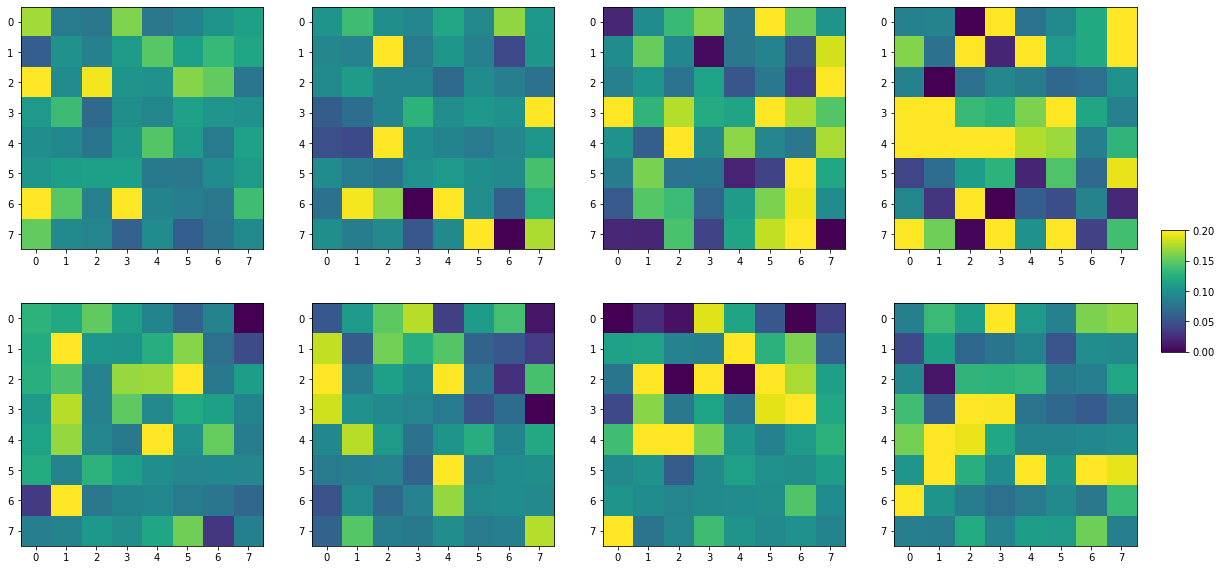

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

for i in range(8):
    ax1 = plt.subplot(2, 4, i+1)
    plt.imshow(r2_[i,1,:,:]-r2_[i,0,:,:]+0.1, vmin=0, vmax=0.2)
    #plt.colorbar()
    
# inset colorbar
axin1 = ax1.inset_axes([1.1, 0.8, 0.1, 0.5])
plt.colorbar(cax=axin1,)

"""
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.imshow(rmse_[i,0,:,:]-rmse_[i,1,:,:])
    plt.colorbar()
"""
        

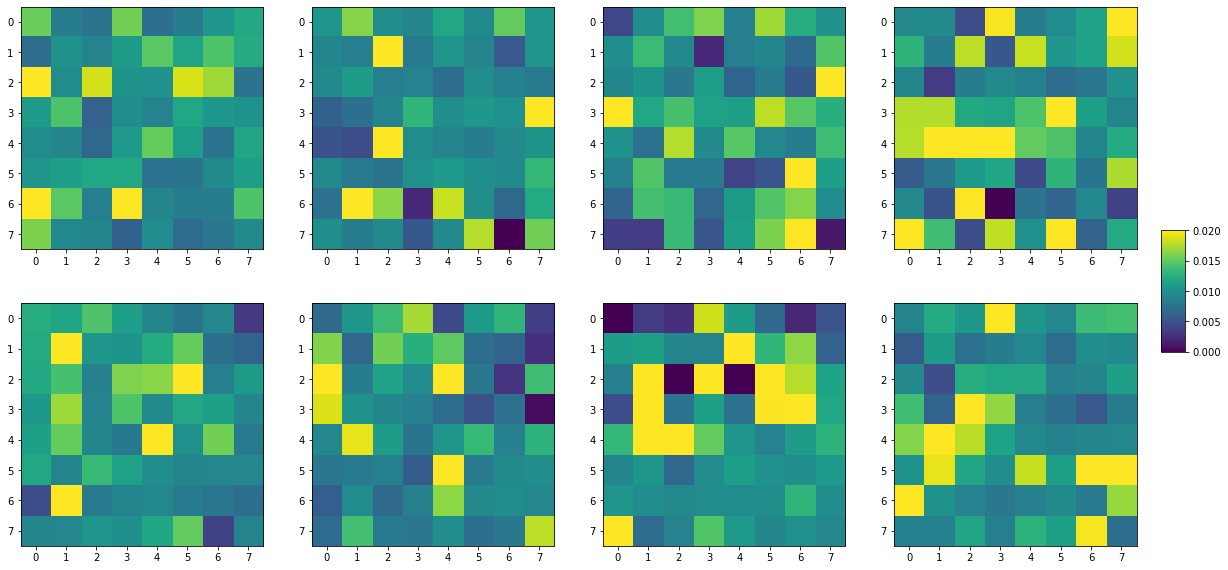

In [173]:
plt.figure(figsize=(20,10))

for i in range(8):
    ax1 = plt.subplot(2, 4, i+1)
    plt.imshow(rmse_[i,0,:,:]-rmse_[i,1,:,:]+0.01, vmin=0, vmax=0.02)
    #plt.colorbar()
    
# inset colorbar
axin1 = ax1.inset_axes([1.1, 0.8, 0.1, 0.5])
plt.colorbar(cax=axin1,)

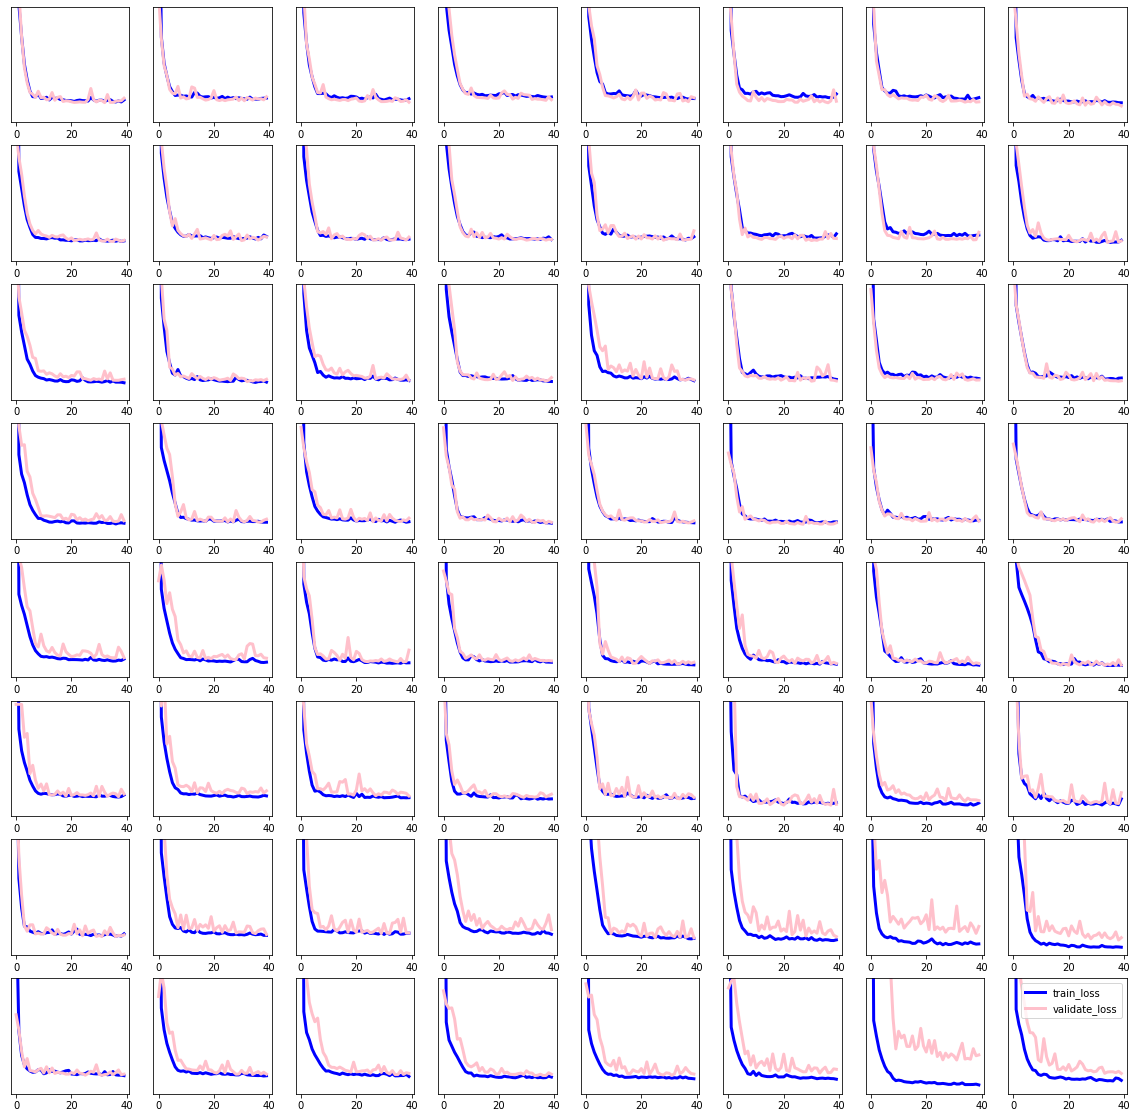

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
loss_ = loss.reshape((40,2, 64))

for i in range(64):
    plt.subplot(8,8,i+1)
    plt.plot(loss_[:,0,i], linewidth=3, color='blue')
    plt.plot(loss_[:,1,i], linewidth=3, color='pink')
    plt.ylim([0, 0.02])
    plt.yticks([])
plt.legend(['train_loss', 'validate_loss'])
plt.savefig('loss.pdf')
    

In [121]:
import pickle
import numpy as np

ROOT = '/work/lilu/AttConvLSTM/'
f = open(ROOT+'100.pickle','rb')
out = pickle.load(f)
print(out.keys())

y_valid = np.squeeze(out['y_valid'])
y_valid.shape

dict_keys(['y_valid', 'pred_valid'])


(2234, 8, 8, 3)